In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0664.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/1269.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3863.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2193.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0733.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3750.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2008.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2081.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0106.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0375.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3919.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import img_to_array, load_img

In [3]:
base_dir = "/kaggle/input/lung-cancer-histopathological-images"

In [4]:
def count_numb_files(base_dir, file_path):
    try:
        file_count = len(os.listdir(os.path.join(base_dir, file_path)))
        return file_count
    except FileNotFoundError:
        print("Directory or file path not found.")
        return 0

file_path_adenocarcinoma = "adenocarcinoma"

num_files = count_numb_files(base_dir, file_path_adenocarcinoma)
print("Number of files adenocarcinoma:", num_files)

file_path_benign = "benign"
num_files_benign = count_numb_files(base_dir, file_path_benign)
print("Number of files in benign", num_files_benign)
num_files_squamous_cell_carcinoma = "squamous_cell_carcinoma"
num_files_squamous_cell_carcinoma = count_numb_files(base_dir, num_files_squamous_cell_carcinoma)
print("Number of files in squamous_cell_carcinoma",num_files_squamous_cell_carcinoma)

Number of files adenocarcinoma: 5000
Number of files in benign 5000
Number of files in squamous_cell_carcinoma 5000


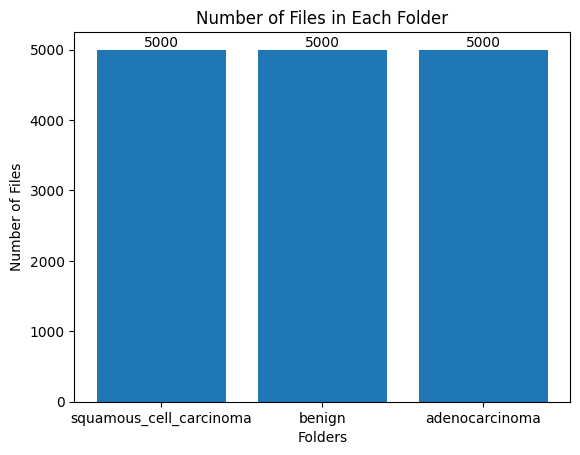

In [5]:
list_of_folders = os.listdir(base_dir)
folder_path = [os.path.join(base_dir, folder) for folder in list_of_folders]

num_of_files_folder = [len(os.listdir(dir_path)) for dir_path in folder_path]
#now viz in bar graph
bars=plt.bar(list_of_folders, num_of_files_folder)
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,  # Y position (height of the bar)
        f'{int(height)}',  # Text to display (number of files)
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.xlabel('Folders')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Folder')

# Show the plot
plt.show()

adenocarcinoma


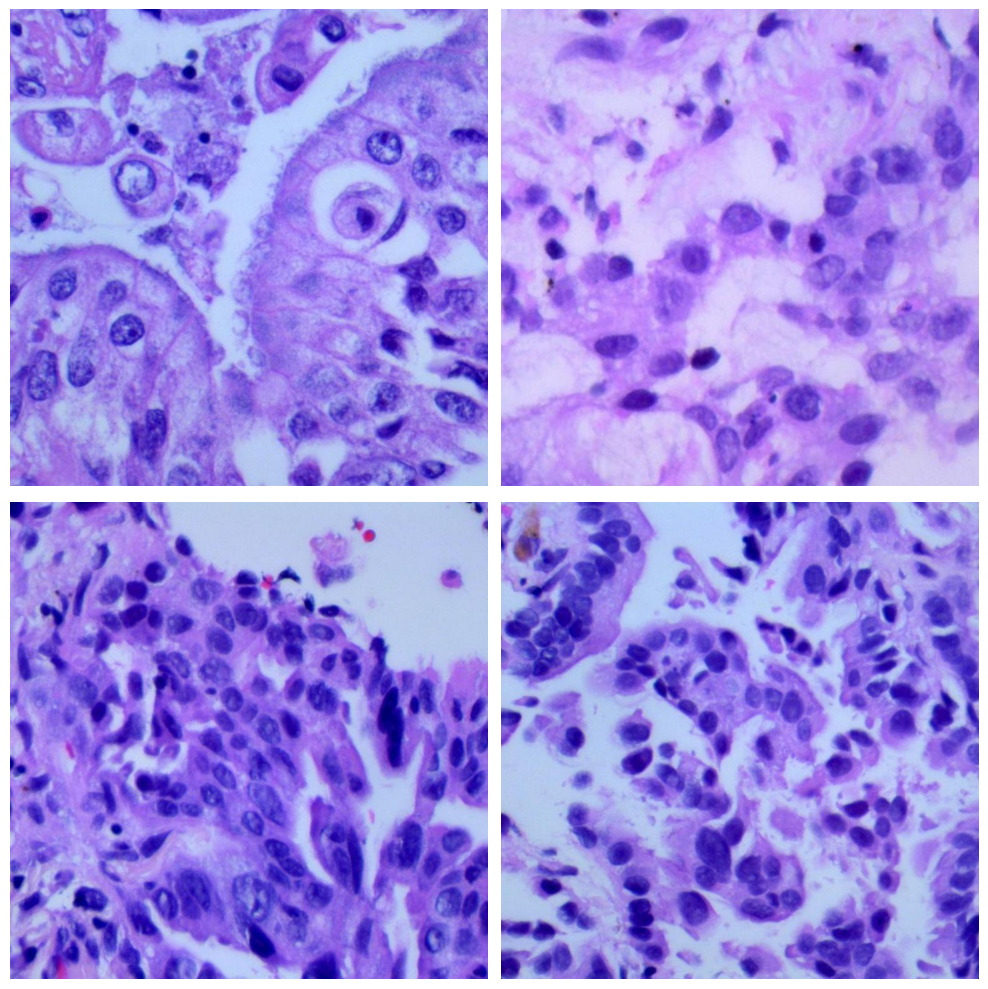

None


In [6]:
#plot the images
def viz_path(file_path_dir):
    viz_path_files = os.listdir(file_path_dir)

    # Create a subplot with 2 rows and 2 columns (for 4 images)
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Loop over the first 4 images
    for i in range(4):
        img_path = os.path.join(file_path_dir, viz_path_files[i])
        img = load_img(img_path)

        ax = axes[i // 2, i % 2]  #
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

    plt.tight_layout()
    plt.show()

print("adenocarcinoma")
print(viz_path("/kaggle/input/lung-cancer-histopathological-images/adenocarcinoma"))

benign


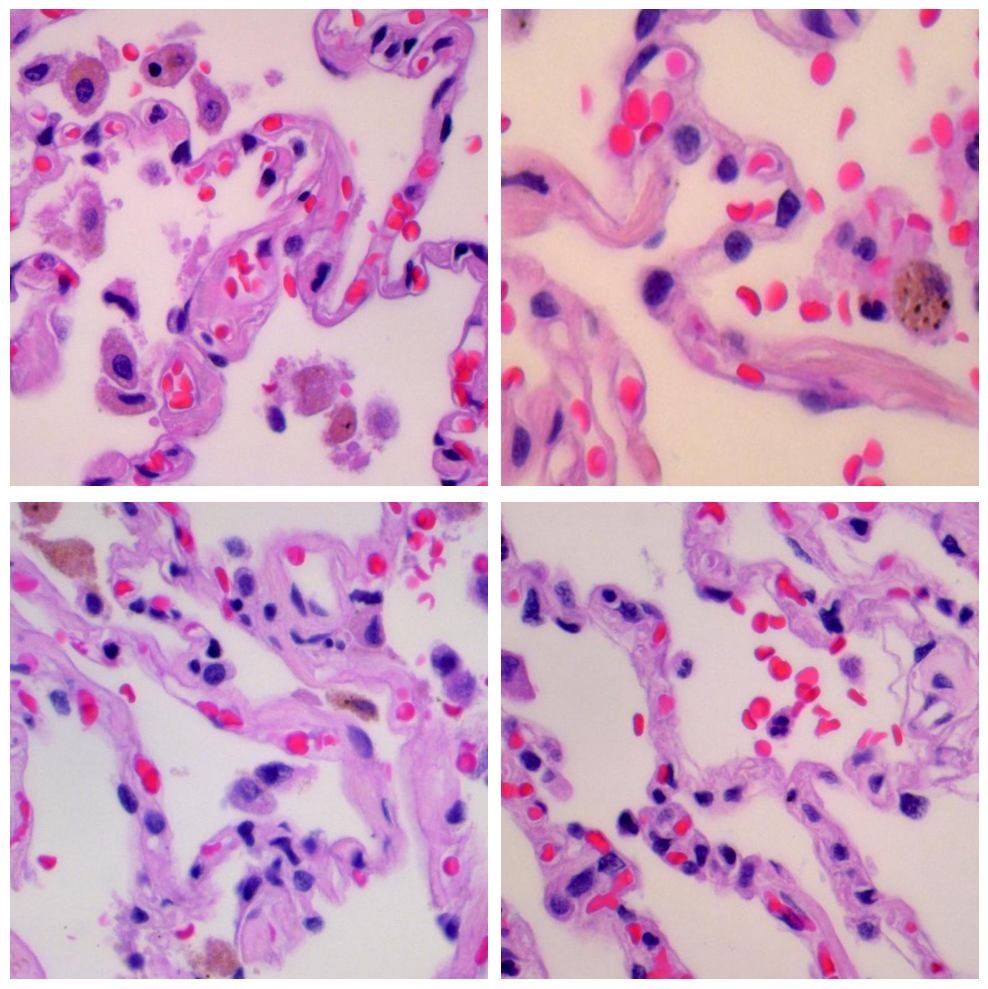

None


In [7]:
print("benign")
print(viz_path("/kaggle/input/lung-cancer-histopathological-images/benign"))

squamous_cell_carcinoma


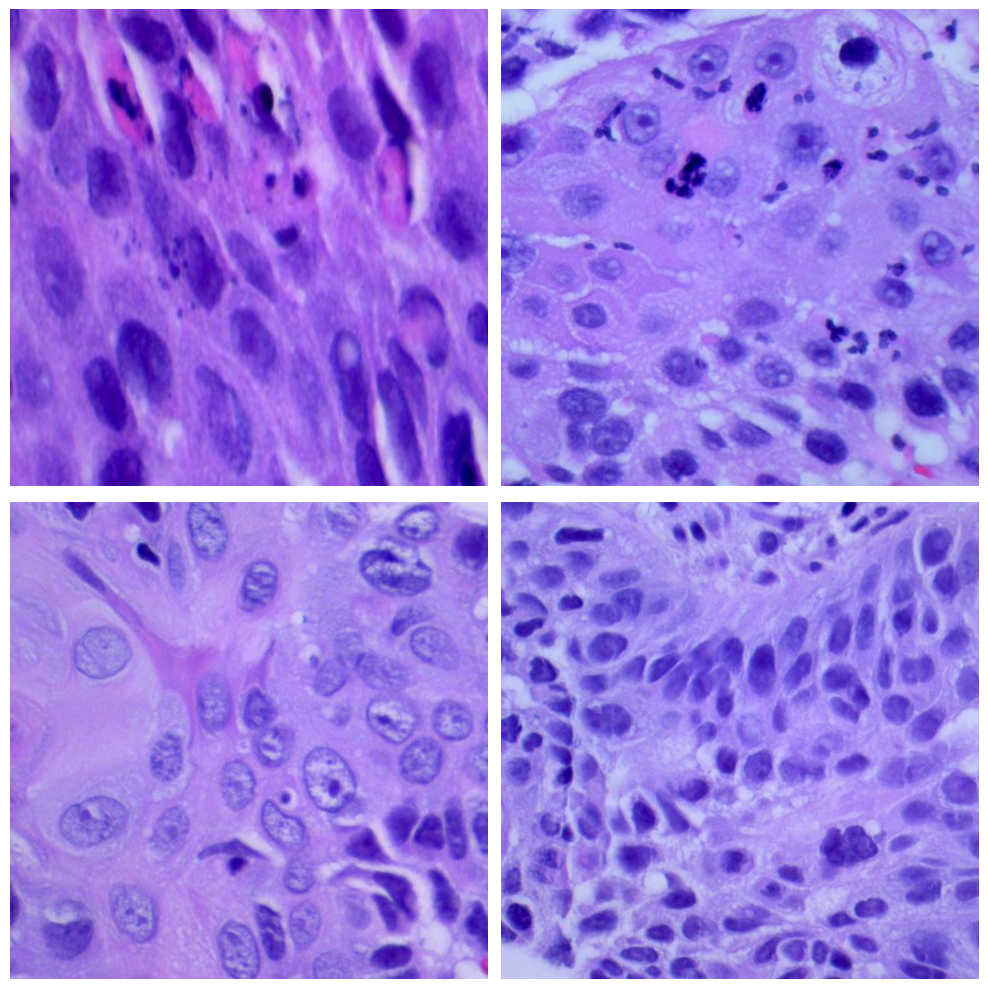

None


In [8]:
print("squamous_cell_carcinoma")
print(viz_path("/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma"))

In [9]:
import shutil
from sklearn.model_selection import train_test_split

# Define paths
base_dir = '/kaggle/input/lung-cancer-histopathological-images'  
output_dir = '/kaggle/working'  #
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Create train and test directories in /kaggle/working
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List of class folders
class_folders = ['squamous_cell_carcinoma', 'benign', 'adenocarcinoma']

# Split ratio
train_split = 0.8  # 80% for training, 20% for testing

# Loop over each class folder
for class_name in class_folders:
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)

    # Split the data into train and test sets
    train_images, test_images = train_test_split(images, train_size=train_split, random_state=42)

    # Create directories for each class in train and test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Move images to the respective train and test directories
    for img in train_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(train_dir, class_name, img)
        shutil.copy(src_path, dest_path)  # Copy instead of move

    for img in test_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(test_dir, class_name, img)
        shutil.copy(src_path, dest_path)

print("Data splitting and directory creation complete!")


Data splitting and directory creation complete!


In [10]:
for class_name in class_folders:
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    num_train_images = len(os.listdir(train_class_dir))
    num_test_images = len(os.listdir(test_class_dir))

    print(f"Class: {class_name}")
    print(f"  Train: {num_train_images} images")
    print(f"  Test: {num_test_images} images")

Class: squamous_cell_carcinoma
  Train: 4000 images
  Test: 1000 images
Class: benign
  Train: 4000 images
  Test: 1000 images
Class: adenocarcinoma
  Train: 4000 images
  Test: 1000 images


In [11]:
def check_shape(file_path):
    image = load_img(file_path) #load img using tf
    image_array = img_to_array(image) #convert to array
    shape_img = image_array.shape
    return shape_img


In [12]:
print(check_shape("/kaggle/input/lung-cancer-histopathological-images/adenocarcinoma/0003.jpg"))
print(check_shape("/kaggle/input/lung-cancer-histopathological-images/benign/0029.jpg"))
print(check_shape('/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0008.jpg'))

(768, 768, 3)
(768, 768, 3)
(768, 768, 3)


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=120,
                                     width_shift_range=0.12,
                                     height_shift_range=0.12,
                                     shear_range=0.12,
                                     zoom_range=0.12,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     brightness_range=[0.5, 2.5],
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(256, 256))

  # Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(256,256))

  return train_generator, validation_generator

In [14]:
train_generator, validation_generator=train_val_generators(TRAINING_DIR=train_dir, VALIDATION_DIR=test_dir)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [15]:
from tensorflow.keras.applications import ConvNeXtTiny

In [16]:
# Base model with specific input shape
base_model = ConvNeXtTiny(include_top=False, weights="imagenet", input_shape=(256,256, 3))

# Create a new input layer from the base model output
x = base_model.output  # Start from the base model output
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)  # Flatten the output layer to 1 dimension
x = Dense(1234, activation='elu')(x)  # First dense layer
x = Dense(1024, activation='elu')(x)   # Second dense layer
x = Dense(3, activation='softmax')(x)  # Output layer

# Define the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

print(model.summary())

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_pres… │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stem  │ (None, 64, 64,    │      4,896 │ convnext_tiny_pr… │
│ (Sequential)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │      4,800 │ convnext_tiny_st… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │         96 │ convnext_tiny_st… │
│ (LayerScale)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64,    │          0 │ convnext_tiny_st… │
│                     │ 96)               │            │ convnext_tiny_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │      4,800 │ add[0][0]         │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 64, 64,    │         96 │ convnext_tiny_st

 Total params: 30,036,789 (114.58 MB)

 Trainable params: 30,036,789 (114.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.991):
      print("\nReached 98.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [18]:
early_back=tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=6,
    verbose=1,
    mode='max',
    restore_best_weights=True, )

In [19]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,batch_size = 32,
                    verbose = 1, callbacks=[callbacks, early_back])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729165067.346286     130 service.cc:145] XLA service 0x7a32b4003620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729165067.346347     130 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729165067.346352     130 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1729165080.796028     164 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_36', 1652 bytes spill stores, 1652 bytes spill loads

I0000 00:00:1729165087.024989  

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.7199 - loss: 0.5905 - precision: 0.7582 - recall: 0.6626

I0000 00:00:1729165399.498786     257 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_30', 1048 bytes spill stores, 1044 bytes spill loads

I0000 00:00:1729165403.744515     258 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 1764 bytes spill stores, 1768 bytes spill loads



375/375 ━━━━━━━━━━━━━━━━━━━━ 372s 785ms/step - accuracy: 0.7202 - loss: 0.5899 - precision: 0.7584 - recall: 0.6630 - val_accuracy: 0.8753 - val_loss: 0.2906 - val_precision: 0.8753 - val_recall: 0.8753
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 316s 732ms/step - accuracy: 0.9256 - loss: 0.1867 - precision: 0.9261 - recall: 0.9254 - val_accuracy: 0.9637 - val_loss: 0.0848 - val_precision: 0.9637 - val_recall: 0.9637
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 280s 732ms/step - accuracy: 0.9396 - loss: 0.1503 - precision: 0.9397 - recall: 0.9394 - val_accuracy: 0.9787 - val_loss: 0.0600 - val_precision: 0.9787 - val_recall: 0.9787
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 277s 725ms/step - accuracy: 0.9672 - loss: 0.0796 - precision: 0.9674 - recall: 0.9672 - val_accuracy: 0.9857 - val_loss: 0.0394 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 280s 733ms/step - accuracy: 0.9732 - loss: 0.0708 - precision: 0.9734 - recall: 0.9731 - val_accuracy: 0.9900 - val

# Train evaluate

In [25]:
model.evaluate(train_generator)

375/375 ━━━━━━━━━━━━━━━━━━━━ 253s 675ms/step - accuracy: 0.9847 - loss: 0.0375 - precision: 0.9847 - recall: 0.9847


[0.03963747248053551, 0.984749972820282, 0.9847487211227417, 0.984666645526886]

# Validate evaluate

In [28]:
model.evaluate(validation_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.9831 - loss: 0.0572 - precision: 0.9831 - recall: 0.9831


[0.04778871312737465, 0.984333336353302, 0.984333336353302, 0.984333336353302]

# F1 Score

In [22]:
def f1_score(precision:float, recall:float):
    if precision + recall == 0:
        return 0.0  # Handle division by zero
    f1_score_ = 2 * (precision * recall) / (precision + recall)
    return f1_score_

In [29]:
f1_score(precision= 0.9847487211227417 ,recall= 0.984666645526886) #train

0.9847076816145592

In [30]:
f1_score(precision = 0.984333336353302,recall=0.984333336353302) #valid

0.984333336353302

# Data Viz Line Chart

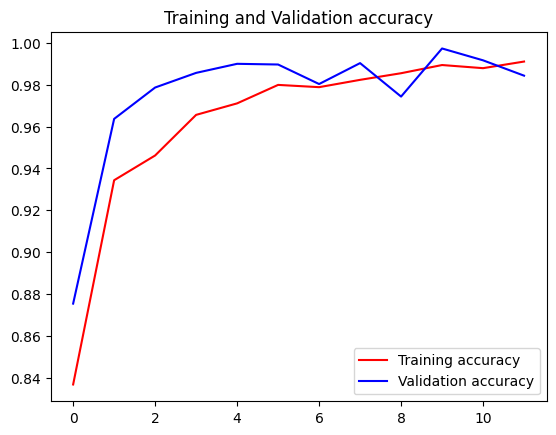

<Figure size 640x480 with 0 Axes>

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

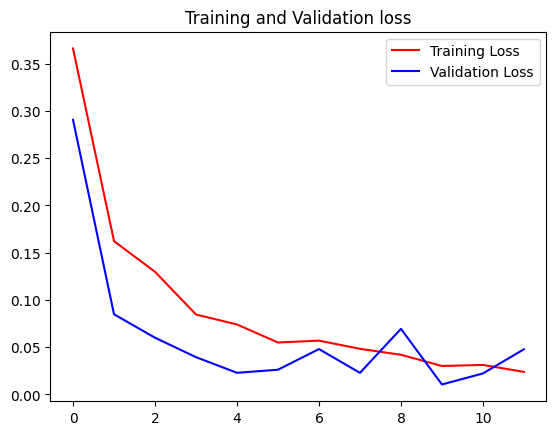

<Figure size 640x480 with 0 Axes>

In [32]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [33]:
model.save("LungClassification.h5")